In [1]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:

#filename="/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/23/1482496748.h5"
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/25/1482627609.h5'

In [3]:
h = katdal.open(filename)

In [4]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/25/1482627609.h5 (version 3.0)
Observer: AR1  Experiment ID: 20161223-0052
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-25 03:00:10.837 SAST to 2016-12-25 03:05:22.706 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m003,m006,m008,m010,m014,m015,m022,m062,m063  18      180
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm003', 'm014', 'm006', 'm063', 'm015', 'm010', 'm022', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (78 dumps, 4096 channels, 180 correlation products) => Size: 460

In [5]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  3
    cal_product_K  ---  2
    cal_product_G  ---  34


In [6]:
np.set_printoptions(precision=4,suppress=True)

In [7]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V123">
[['m003', 'm006', 'm008', 'm010', 'm014', 'm015', 'm022', 'm062', 'm063']]
['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm022' 'm062' 'm063']


# Delays

In [8]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [9]:
k_array.shape #Times,Pols,Antennas

(2, 2, 9)

In [10]:
# print delays (if there are few delays)
print 'POL 0: ', k_0
print 'POL 1: ', k_1

POL 0:  [[  -0.     -101.8181 -147.4212 -188.7386 -149.7521 -127.7403  231.9128
  -134.4452 -113.6876]
 [   0.        0.0124    0.0139    0.0191    0.0303    0.0104    0.0138
     0.0477    0.0537]]
POL 1:  [[  -0.       -1.6702  -50.1948    1.7599  -51.3973  -31.2452  327.8159
   -41.5408  -20.7355]
 [  -0.       -0.0252    0.0004    0.0036    0.0154    0.0037   -0.0135
     0.0457    0.0388]]


In [11]:
print labels

['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm022' 'm062' 'm063']


In [12]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

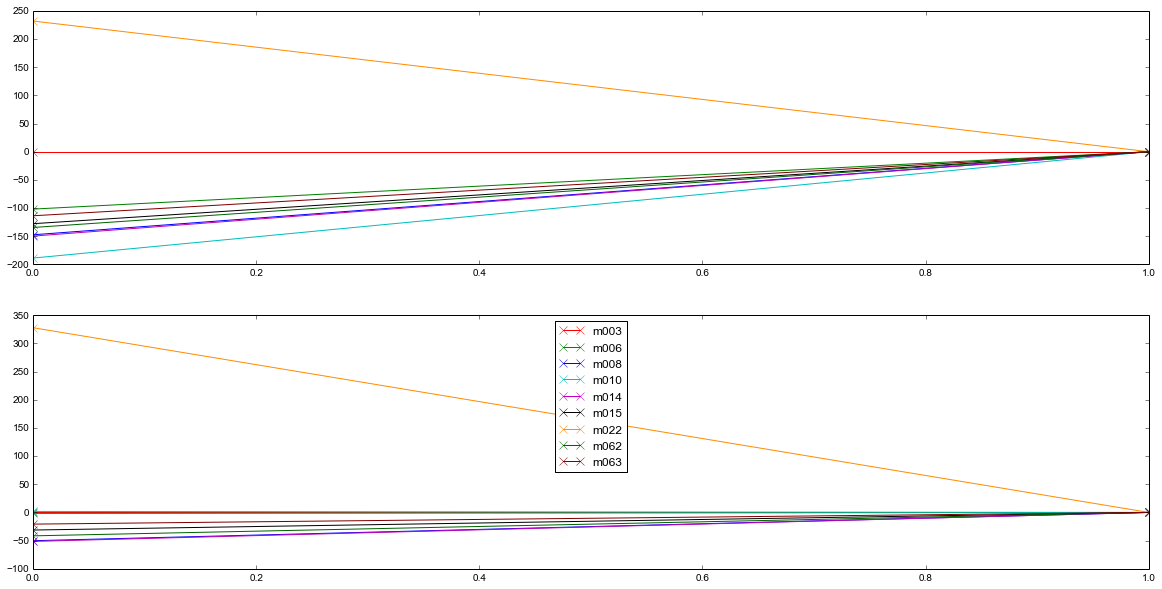

In [40]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [14]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(34, 2, 9)


In [15]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 1.0008  0.9987  1.0006  1.0008  1.0016  0.9987  0.9988  1.0005  1.0004]
[ 1.001   1.      1.0006  1.      0.9999  0.999   1.0001  0.9998  0.9997]


In [16]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 1.2316  1.7172  1.3356  1.4864  1.3062  1.8801  1.916   1.3462  1.6747]
[ 1.6984  1.5918  1.3589  1.3286  1.3806  1.4799  1.8693  1.5728  1.371 ]


In [17]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 1.2306  1.7195  1.3348  1.4852  1.3042  1.8826  1.9183  1.3455  1.6741]
[ 1.6967  1.5919  1.358   1.3287  1.3807  1.4814  1.8691  1.5731  1.3715]


In [18]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  0.     -28.0237  45.34   -10.8393  56.3584 -11.4389 -22.5876  25.8947
  -8.9193]
[  0.     -85.6256 -17.9728 -28.4076 -43.1693 -66.5995 -67.752  -62.3871
 -35.9469]


In [19]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[  0.      -8.5577  -5.5867  -6.3607 -13.6552  -3.3696  -4.0064  46.9659
 -70.9274]
[  0.       7.8785   0.3333   0.5218  -6.6909  -0.8046   8.5275  47.8683
 -64.1363]


In [20]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[  0.      19.4661 -50.9267   4.4786 -70.0136   8.0694  18.5811  21.0712
 -62.0081]
[  -0.       93.5042   18.3062   28.9294   36.4784   65.795    76.2795
  110.2554  -28.1894]


/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


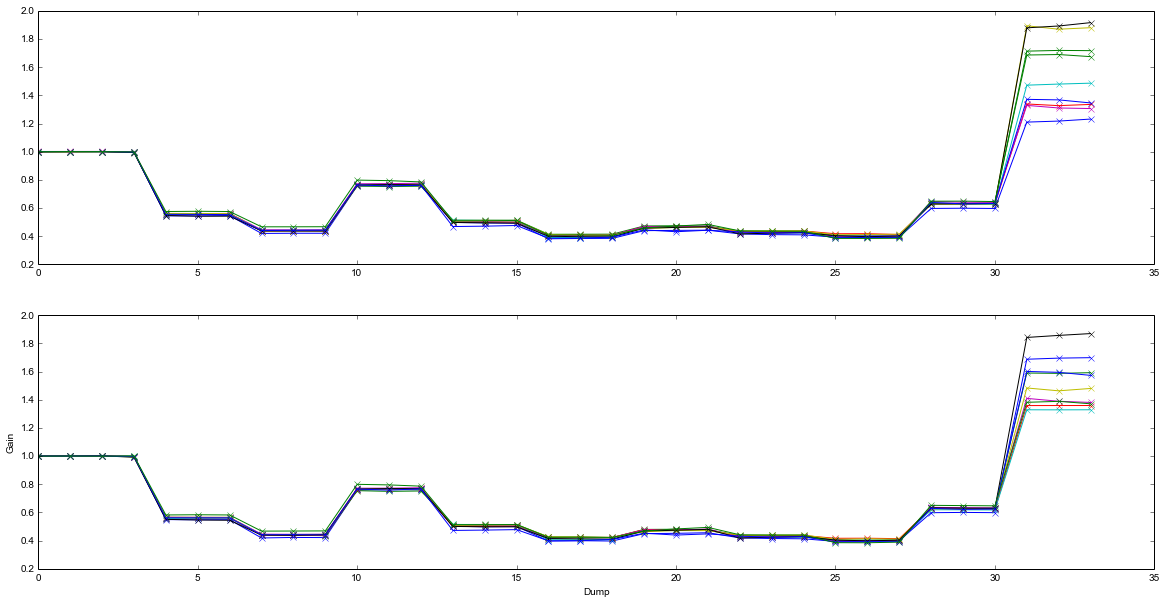

In [21]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

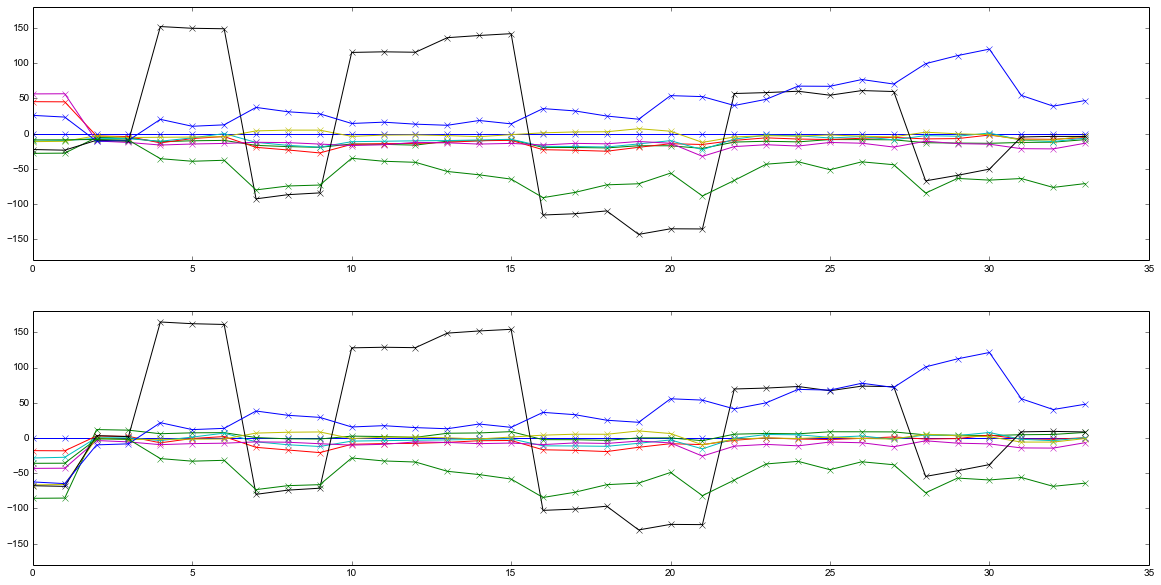

In [22]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [33]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(3, 4096, 2, 9)


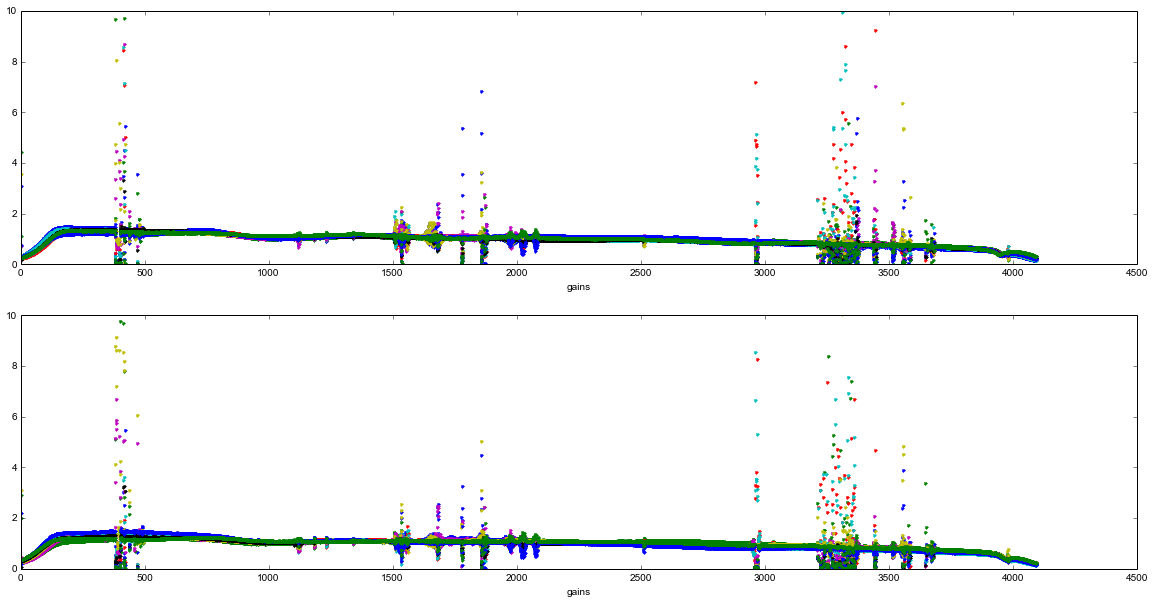

In [34]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

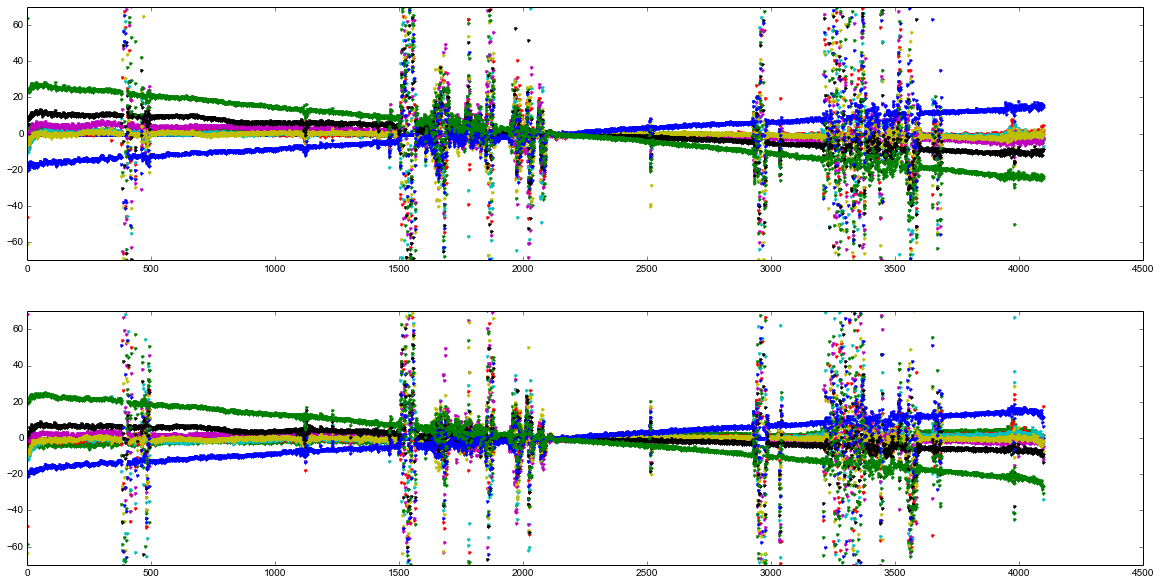

In [35]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
ax[1].set_ylim([-70,70]);

In [36]:
b_array.shape
# Time,channels,pols,antennas

(3, 4096, 2, 9)

In [37]:
#last bandpass
b_0_1 = b_array[0,:,0,8]
b_1_1 = b_array[0,:,1,8]
b_1_1.shape
print a_array[:,8]

['m063']


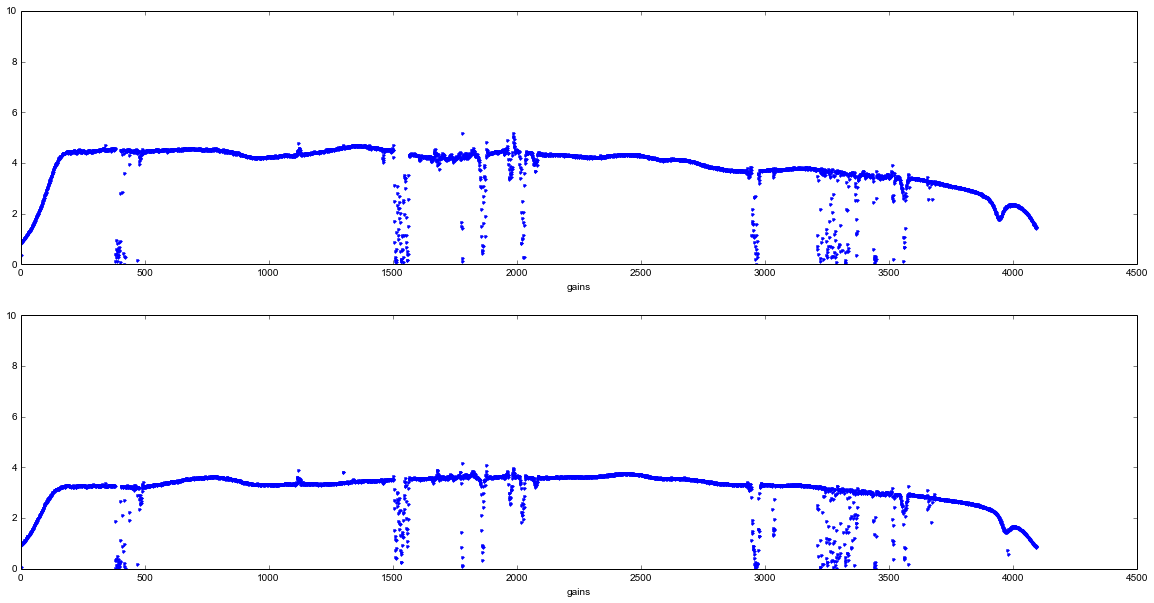

In [38]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

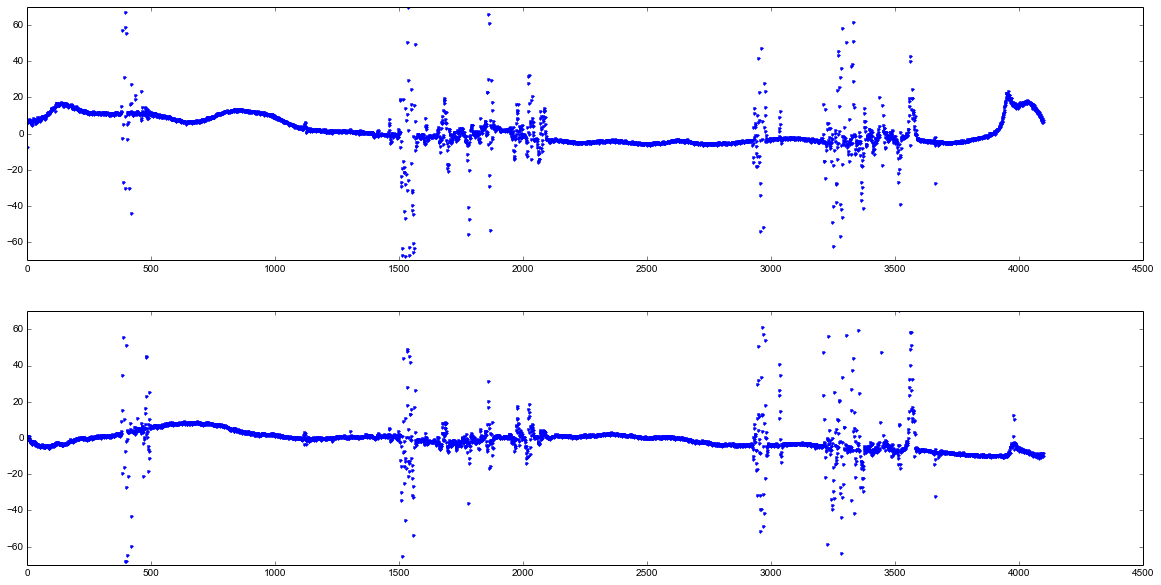

In [39]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);